In [1]:
# Library untuk dataframe dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
%matplotlib inline
# Import library untuk Clustering
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
data = pd.read_csv('dataset_rev_02.csv',sep=";")

In [3]:
data

,NO,#,Address,SSID,Channel,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise,Radio_Name,RouterOS_Version
0,1,0,08:55:31:5C:F9:7C,test123,5110/20-Ce/an,5110,-76,-115,39,0855315CF97C,6.49.6
1,2,1,E0:63:DA:D4:F8:CC,NaN,5110/20-eeCe/ac,5110,-59,-115,56,NaN,NaN
2,3,2,2C:C8:1B:40:C6:F5,SERSER,5125/20-Ce/an,5125,-66,-115,49,2CC81B40C6F5,6.46.8
3,4,3,74:83:C2:5C:84:F6,ubnt cpp,5150/20/an,5150,-59,-114,55,Tasya Media Ne,2.9.31
4,5,4,08:55:31:87:B5:6C,NYANYA 120,5150/20/an,5150,-86,-114,28,08553187B56C,NaN
...,...,...,...,...,...,...,...,...,...,...,...
451,452,169,08:55:31:0B:4F:BD,AP72,5360/20/an,5360,-91,-114,23,AP GASPOL,6.45.9
452,453,170,74:4D:28:E7:F6:A7,i-ACCESS-5G,5220/20-eC/ac,5220,-88,-113,25,METAL-52AC,7.1.5
453,454,171,C4:AD:34:9B:27:DD,i-ACCESS-5G,5300/20-eC/ac,5300,-86,-113,27,MANTBOX,6.48.6
454,455,172,C4:AD:34:8B:28:C4,SPEEDNET TO RAMPOK,5535/20/an,5535,-90,-115,25,SPEEDNET PENDAWA,6.45.9


In [4]:
data.isnull().any()

NO                  False
#                   False
Address             False
SSID                 True
Channel             False
Head_Channel        False
Signal_Strength     False
Noise_Floor         False
Signal_To_Noise     False
Radio_Name           True
RouterOS_Version     True
dtype: bool

In [5]:
data = data.drop_duplicates(subset=["Address","Head_Channel", "Signal_Strength","Noise_Floor","Signal_To_Noise"], keep=False)
data

,NO,#,Address,SSID,Channel,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise,Radio_Name,RouterOS_Version
0,1,0,08:55:31:5C:F9:7C,test123,5110/20-Ce/an,5110,-76,-115,39,0855315CF97C,6.49.6
1,2,1,E0:63:DA:D4:F8:CC,NaN,5110/20-eeCe/ac,5110,-59,-115,56,NaN,NaN
2,3,2,2C:C8:1B:40:C6:F5,SERSER,5125/20-Ce/an,5125,-66,-115,49,2CC81B40C6F5,6.46.8
3,4,3,74:83:C2:5C:84:F6,ubnt cpp,5150/20/an,5150,-59,-114,55,Tasya Media Ne,2.9.31
4,5,4,08:55:31:87:B5:6C,NYANYA 120,5150/20/an,5150,-86,-114,28,08553187B56C,NaN
...,...,...,...,...,...,...,...,...,...,...,...
451,452,169,08:55:31:0B:4F:BD,AP72,5360/20/an,5360,-91,-114,23,AP GASPOL,6.45.9
452,453,170,74:4D:28:E7:F6:A7,i-ACCESS-5G,5220/20-eC/ac,5220,-88,-113,25,METAL-52AC,7.1.5
453,454,171,C4:AD:34:9B:27:DD,i-ACCESS-5G,5300/20-eC/ac,5300,-86,-113,27,MANTBOX,6.48.6
454,455,172,C4:AD:34:8B:28:C4,SPEEDNET TO RAMPOK,5535/20/an,5535,-90,-115,25,SPEEDNET PENDAWA,6.45.9


In [6]:

data.to_excel("drop_duplicate_remove.xlsx", index=False) 

In [7]:
# Hilangkan Variabel yang Tidak Perlu
data = data.drop(['NO','#','Address','SSID','Channel','Radio_Name','RouterOS_Version'], axis = 1)
data

,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise
0,5110,-76,-115,39
1,5110,-59,-115,56
2,5125,-66,-115,49
3,5150,-59,-114,55
4,5150,-86,-114,28
...,...,...,...,...
451,5360,-91,-114,23
452,5220,-88,-113,25
453,5300,-86,-113,27
454,5535,-90,-115,25


In [8]:
# Memeriksa Kolom Numerik
data.columns[(data.dtypes !='object').values].tolist()

['Head_Channel', 'Signal_Strength', 'Noise_Floor', 'Signal_To_Noise']

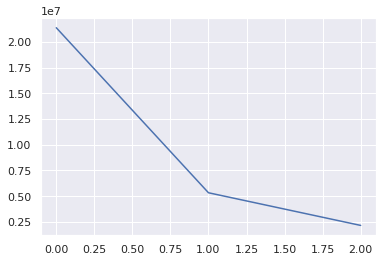

In [9]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [1, 2, 3]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [10]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6403297559306167
For n_clusters=3, the silhouette score is 0.6207026112312325
For n_clusters=4, the silhouette score is 0.5732480323230708


In [11]:
# Final model with k=2
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data)

KMeans(max_iter=50, n_clusters=3)

In [12]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1,
       0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2,
       0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1,
       0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,

In [28]:
# Assign the label
data['cluster'] = kmeans.labels_
total_rows = data['Head_Channel'].count
data

,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise,cluster,kluster
0,5110,-76,-115,39,0,0
1,5110,-59,-115,56,0,0
2,5125,-66,-115,49,0,0
3,5150,-59,-114,55,0,0
4,5150,-86,-114,28,0,0
...,...,...,...,...,...,...
451,5360,-91,-114,23,2,2
452,5220,-88,-113,25,0,0
453,5300,-86,-113,27,0,0
454,5535,-90,-115,25,2,2


In [30]:
data.to_excel("hasil_klastering.xlsx", index=False) 

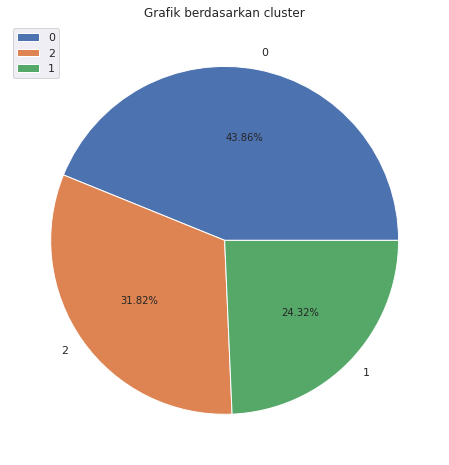

In [29]:
# Grafik ini menunjukkan bahwa pengguna frekuensi berdasarkan cluster
plt.figure(figsize = (8,8))
plt.pie(data['cluster'].value_counts(), labels=data['cluster'].value_counts().index, autopct='%3.2f%%')
plt.title('Grafik berdasarkan cluster')
plt.legend()
plt.show()

In [15]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data)

In [16]:
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 1 0 0 2 1 1 0 0 0 2 2 1 2 1 0 2 1
 2 0 1 2 2 0 0 0 1 0 0 1 2 0 0 2 2 0 2 2 2 2 0 0 0 2 2 0 0 2 1 0 1 1 0 2 1
 0 2 2 1 1 0 0 1 0 0 0 0 2 2 2 1 1 0 0 1 0 1 2 2 1 1 0 2 1 1 1 2 0 1 0 1 0
 2 1 0 1 0 2 1 1 0 0 2 0 2 2 2 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 1 1 1 1 0 0 0 0 2 2 2 1 1 0 2 0 0 2 2 2 2 0 0 1 1 1 0 0 0 2 0 0
 1 1 0 2 2 0 2 0 2 0 0 2 0 2 1 0 2 2 0 0 0 0 0 1 1 0 2 1 0 2 0 0 1 0 0 2 0
 2 1 0 0 0 1 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 0 2 2 2 1 1 1 0 0 0
 0 0 0 0 0 0 2 2 0 0 0 0 2 1 1 0 0 2 2 1 0 2 0 0 0 1 1 0 0 0 2 2 0 0 2 0 0
 2 1 0 0 1 0 2 2 1 0 1 1 2 1 2 1 1 1 1 0 2 2 0 1 0 2 0 2 1 0 1 0 0 2 1 2 0
 2 1 0 0 1 1 0 2 1 1 0 1 0 2 0 0 1 2 0 1 2 0 0 1 1 0 1 1 2 0 0 2 2]


In [17]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label2 = data[label == 0]
 
filtered_label8 = data[label == 2]

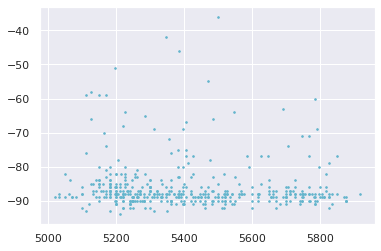

In [18]:
plt.scatter(data.Head_Channel , data.Signal_Strength, s =10, c = 'c', marker = '.', alpha = 1)
plt.show()

In [19]:
x_array = np.array(data)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.10055866, 0.31034483, 0.72727273, 0.3442623 , 1.        ],
       [0.10055866, 0.60344828, 0.72727273, 0.62295082, 1.        ],
       [0.11731844, 0.48275862, 0.72727273, 0.50819672, 1.        ],
       ...,
       [0.31284916, 0.13793103, 0.90909091, 0.14754098, 1.        ],
       [0.57541899, 0.06896552, 0.72727273, 0.1147541 , 0.5       ],
       [0.59217877, 0.18965517, 0.63636364, 0.24590164, 0.5       ]])

In [21]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [22]:
print(kmeans.cluster_centers_)

[[ 2.11740527e-01  1.40879042e-01  8.07348092e-01  1.68691073e-01
   1.00000000e+00]
 [ 7.99404793e-01  1.27135031e-01  4.11214953e-01  2.27056841e-01
  -2.22044605e-16]
 [ 4.68595371e-01  1.45566502e-01  7.07142857e-01  1.91217799e-01
   5.00000000e-01]]


In [23]:
data['kluster'] = kmeans.labels_

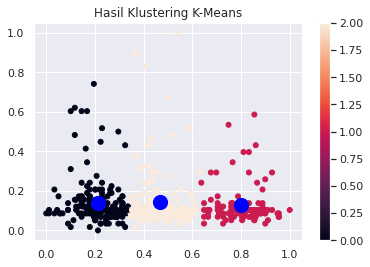

In [24]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = data.kluster, marker = '.', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()